In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from pyvi import ViTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv('fb_vn.csv')

In [3]:
fb.columns = map(str.lower, fb.columns)
fb.shape

fb['label'] = fb['label'].apply(lambda x: str(int(x)))

max_features = 2000

fb['message'] = fb['message'].apply(ViTokenizer.tokenize)

In [4]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(fb['message'].values)
X = tokenizer.texts_to_sequences(fb['message'].values)
X = pad_sequences(X)

print(fb.head(10))

                                             message label
0  giáo_viên đúng giờ nhưng họ cũng_nên cung_cấp ...     0
1                                                Tốt     1
2  Các bài giảng xuất_sắc được giảng_dạy bởi các ...     1
3                                                Tốt     1
4  giáo_viên cung_cấp cho chúng_tôi tất_cả các th...     1
5                                               Đúng     1
6                                    tốt và đúng giờ     1
7                                             Nó tốt     1
8                                                Tốt     1
9                                                Tốt     1


In [5]:
fb.label.value_counts()

label
1     810
0     153
-1    147
Name: count, dtype: int64

In [6]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(743, 149) (743, 3)
(367, 149) (367, 3)


In [7]:
embed_dim = 200
lstm_out = 200

In [8]:
model = Sequential()
#model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Embedding(max_features, embed_dim))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 30, batch_size=batch_size, verbose = 2)

Epoch 1/30
24/24 - 5s - 196ms/step - accuracy: 0.6958 - loss: 0.7608
Epoch 2/30
24/24 - 2s - 100ms/step - accuracy: 0.7349 - loss: 0.5984
Epoch 3/30
24/24 - 2s - 94ms/step - accuracy: 0.7820 - loss: 0.5122
Epoch 4/30
24/24 - 2s - 102ms/step - accuracy: 0.8331 - loss: 0.4118
Epoch 5/30
24/24 - 2s - 99ms/step - accuracy: 0.9098 - loss: 0.2922
Epoch 6/30
24/24 - 2s - 96ms/step - accuracy: 0.9260 - loss: 0.2268
Epoch 7/30
24/24 - 2s - 97ms/step - accuracy: 0.9381 - loss: 0.1792
Epoch 8/30
24/24 - 2s - 97ms/step - accuracy: 0.9623 - loss: 0.1275
Epoch 9/30
24/24 - 2s - 97ms/step - accuracy: 0.9677 - loss: 0.0932
Epoch 10/30
24/24 - 2s - 98ms/step - accuracy: 0.9690 - loss: 0.0940
Epoch 11/30
24/24 - 2s - 95ms/step - accuracy: 0.9798 - loss: 0.0643
Epoch 12/30
24/24 - 2s - 104ms/step - accuracy: 0.9825 - loss: 0.0697
Epoch 13/30
24/24 - 2s - 102ms/step - accuracy: 0.9865 - loss: 0.0449
Epoch 14/30
24/24 - 2s - 100ms/step - accuracy: 0.9865 - loss: 0.0417
Epoch 15/30
24/24 - 3s - 115ms/step -

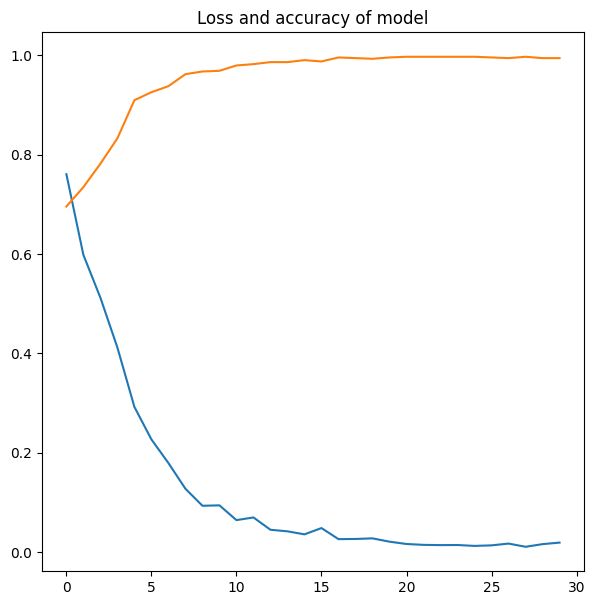

In [10]:
history = pd.DataFrame(hist.history)
plt.figure(figsize=(7,7))
plt.plot(history["loss"])
plt.plot(history["accuracy"])
plt.title("Loss and accuracy of model")
plt.show()

In [11]:
#Testing the model, and retrieveing score and accuracy:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8084 - loss: 0.9226
score: 0.93
accuracy: 0.81


In [12]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [13]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 165ms/step
1/1 - 0s - 22ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 28ms/step
1/1 - 0s - 34ms/step
1/1 - 0s - 28ms/step
1/1 - 0s - 27ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 27ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 22ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 22ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 22ms/step
1/1 - 0s - 22ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 23ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 2

In [14]:
cmnt = ['trung bình thôi']
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("neutral")
else:
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  85  80 461]]
1/1 - 0s - 190ms/step
[0.0083821  0.982276   0.00934182]
neutral
